In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as ss

In [ ]:
!pip install xgboost

In [ ]:
import imblearn

In [ ]:
!pip install imbalanced-learn==0.10.1

In [ ]:
pip show imblearn

Name: imblearn
Version: 0.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://pypi.python.org/pypi/imbalanced-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: UNKNOWN
Location: c:\users\1381m\appdata\roaming\python\python39\site-packages
Requires: imbalanced-learn
Required-by: Note: you may need to restart the kernel to use updated packages.



In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay, recall_score, precision_score

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

In [ ]:
import warnings
warnings.filterwarnings('always')

In [ ]:
df = pd.read_csv('archive/fraud_oracle.csv')

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.shape

(15420, 33)

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [ ]:
df.Year.value_counts()

1994    6142
1995    5195
1996    4083
Name: Year, dtype: int64

In [ ]:
df.AccidentArea.value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

In [ ]:
df.PolicyNumber

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [ ]:
df.drop('PolicyNumber', axis = 1, inplace = True)

In [ ]:
df.PolicyType.value_counts()


Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64

In [ ]:
df['Car_type'] = [None for _ in range(15420)]

In [ ]:
for i , row in enumerate(df['PolicyType']):
  df['Car_type'][i] = row.split('-')[0]

In [ ]:
df.Car_type.value_counts()

Sedan       14658
Utility       391
Sport         371
Name: Car_type, dtype: int64

In [ ]:
df['Insurance_type'] = [None for _ in range(15420)]

In [ ]:
for i , row in enumerate(df['PolicyType']):
  df['Insurance_type'][i] = row.split('-')[1]

In [ ]:
df.Insurance_type.value_counts()

 Collision     5962
 Liability     5009
 All Perils    4449
Name: Insurance_type, dtype: int64

In [ ]:
df.drop('PolicyType', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  VehicleCategory       15420 non-null  object
 13  VehiclePrice          15420 non-null  object
 14  FraudFound_P          15420 non-null  int64 
 15  RepNumber             15420 non-null

In [ ]:
df.DayOfWeekClaimed.value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [ ]:
df[df['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Car_type,Insurance_type
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,No,No,External,none,no change,1 vehicle,1994,All Perils,Sedan,All Perils


In [ ]:
df.drop(1516, inplace = True)

In [ ]:
df.DayOfWeekClaimed.value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

In [ ]:
df.MaritalStatus.value_counts()

Married     10625
Single       4683
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [ ]:
df.Age.value_counts()[0]

319

In [ ]:
df.drop(df[df['Age'] == 0].index, inplace = True)

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.NumberOfCars.value_counts()

1 vehicle      14018
2 vehicles       691
3 to 4           368
5 to 8            21
more than 8        2
Name: NumberOfCars, dtype: int64

In [ ]:
df.isnull().sum()

index                   0
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
Car_type                0
Insurance_type          0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
df.drop('index', axis = 1, inplace = True)

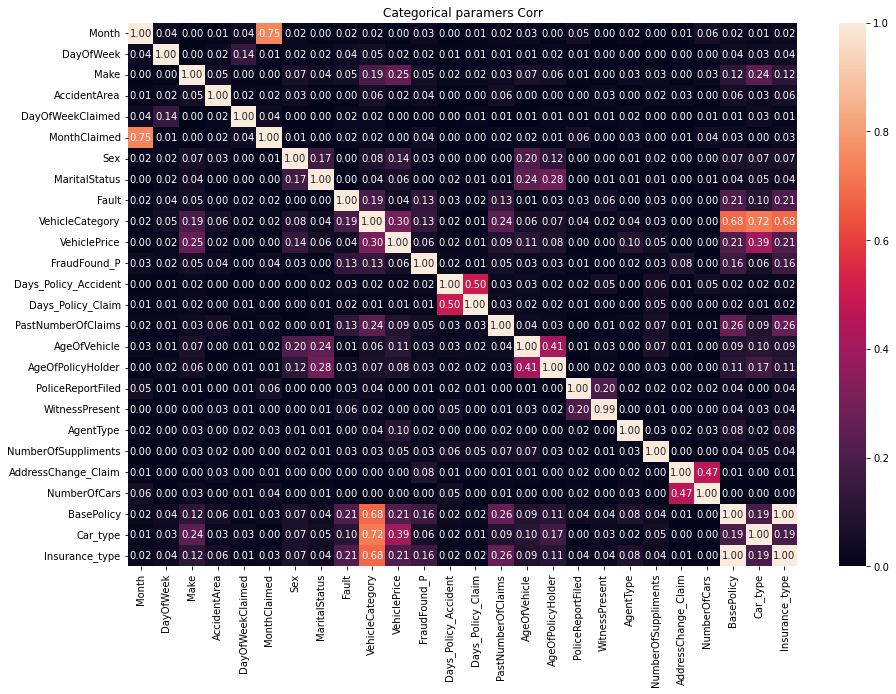

In [ ]:
ob=[]
for data in df.columns:
    if data == 'FraudFound_P':
        ob.append(data)
    if df[data].dtype=='object':
        ob.append(data)
        
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_df = pd.DataFrame(index=ob)

for x in ob:
    a = []
    for y in ob:
        a.append(cramers_v(df[y], df[x]))
    cramers_df[x] = a


plt.figure(figsize=(15,10))
sns.heatmap(cramers_df, annot=True, fmt='.2f')
plt.title('Categorical paramers Corr')
plt.show()

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy', 'Car_type',
       'Insurance_type'],
      dtype='object')

In [ ]:
df.drop('VehicleCategory', axis = 1, inplace = True)

In [ ]:
df.drop('MonthClaimed', axis = 1, inplace = True)

In [ ]:
df.drop('Insurance_type', axis = 1, inplace = True)

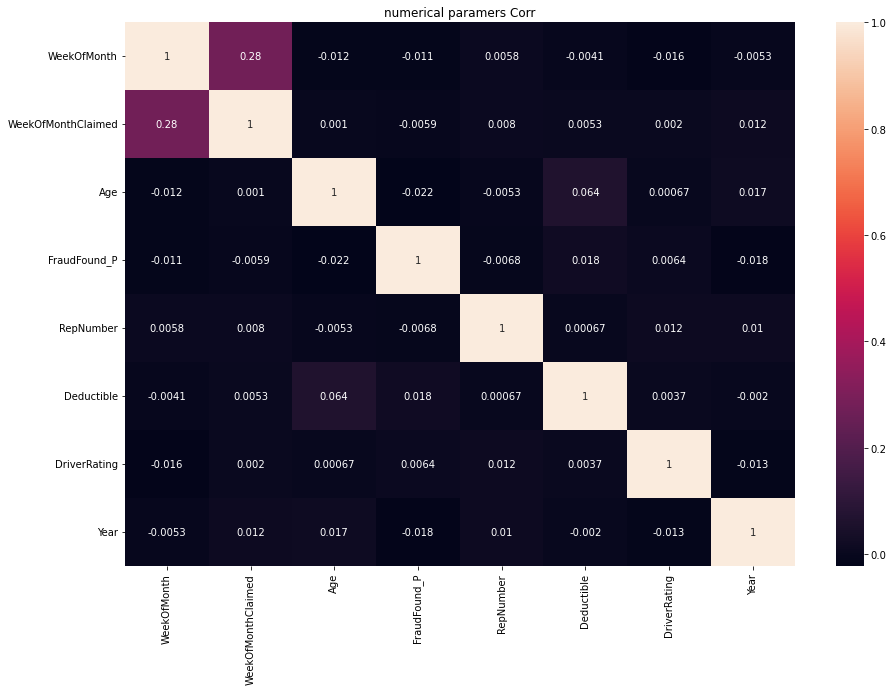

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('numerical paramers Corr')

plt.show()

array([[<AxesSubplot:title={'center':'WeekOfMonth'}>,
        <AxesSubplot:title={'center':'WeekOfMonthClaimed'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'FraudFound_P'}>,
        <AxesSubplot:title={'center':'RepNumber'}>,
        <AxesSubplot:title={'center':'Deductible'}>],
       [<AxesSubplot:title={'center':'DriverRating'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

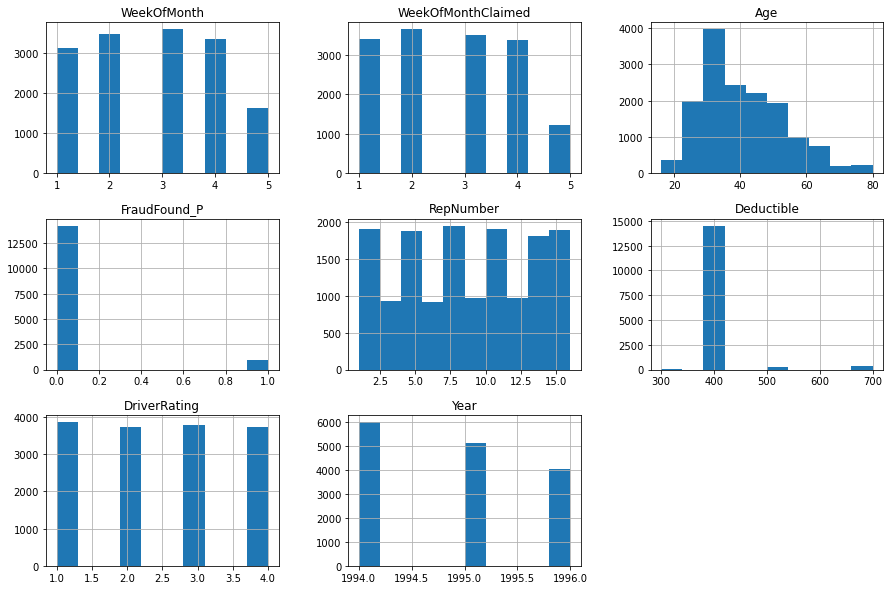

In [ ]:
df.hist(figsize=(15,10))

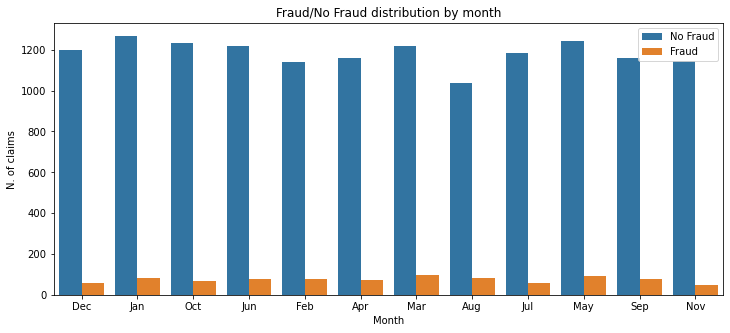

In [ ]:

plt.figure(figsize=(12, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Month", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by month')

plt.ylabel('N. of claims')
plt.show()

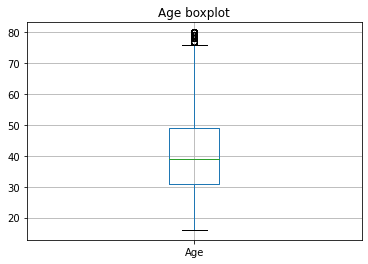

In [ ]:
df.boxplot(column = 'Age')
plt.title('Age boxplot')

plt.show()

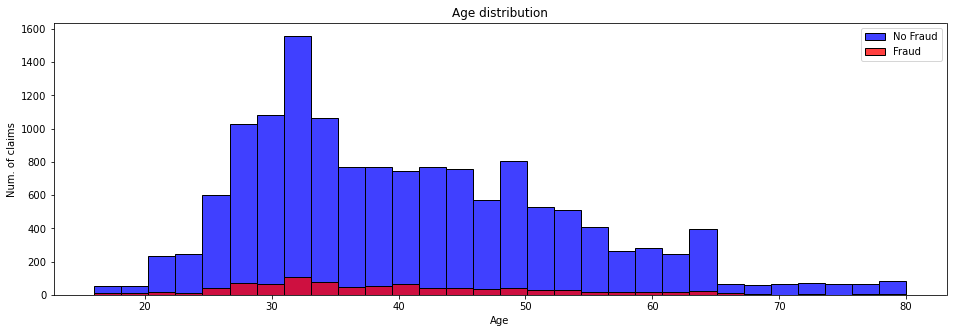

In [ ]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]

plt.figure(figsize=(16,5))
sns.histplot(data = df_no_fraud, x = 'Age', color = 'blue', bins = 30)
sns.histplot(data = df_fraud1, x = 'Age', color = 'red', bins = 30)
plt.title('Age distribution')
plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.show()

In [ ]:
df['Age'].min()

16

In [ ]:
len(np.where((df['Age'] == 18)  & (df['FraudFound_P'] == 1))[0])

8

In [ ]:
arr = []
arr.append([])
arr.append([])
for i in range(16, 81):
    arr[0].append(i)
    arr[1].append(float(len(np.where((df['Age'] == i)  & (df['FraudFound_P'] == 1))[0])) / float(len(np.where((df['Age'] == i)  & (df['FraudFound_P'] == 0))[0])) * 100)


In [ ]:
arr

[[16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 [12.5,
  20.0,
  20.0,
  18.51851851851852,
  12.0,
  3.2520325203252036,
  10.619469026548673,
  2.5210084033613445,
  6.299212598425196,
  6.122448979591836,
  6.36182902584493,
  6.299212598425196,
  7.2796934865900385,
  5.950095969289827,
  6.618962432915922,
  6.796116504854369,
  9.236947791164658,
  5.321100917431193,
  5.330882352941177,
  9.845559845559846,
  6.282722513089005,
  5.670103092783505,
  6.077348066298343,
  6.87960687960688,
  8.806818181818182,
  7.908163265306123,
  3.6175710594315245,
  6.315789473684211,
  5.115089514066496,
  5.7534246575342465,
  10.037174721189592,
  2.6

Text(0.5, 0, 'Age')

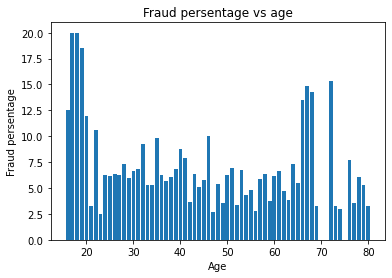

In [ ]:
plt.bar(arr[0], arr[1])
plt.title('Fraud persentage vs age')

plt.ylabel('Fraud persentage')
plt.xlabel('Age')

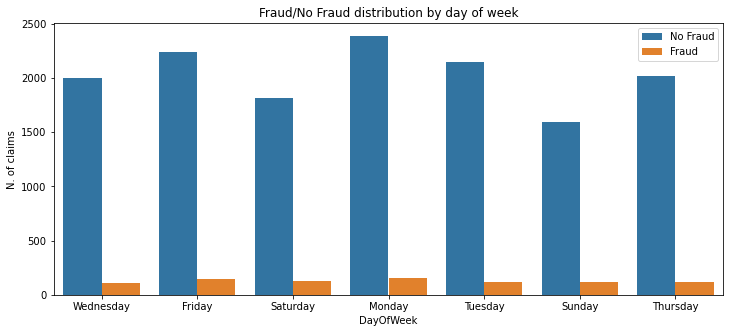

In [ ]:
plt.figure(figsize=(12, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="DayOfWeek", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by day of week')

plt.ylabel('N. of claims')
plt.show()

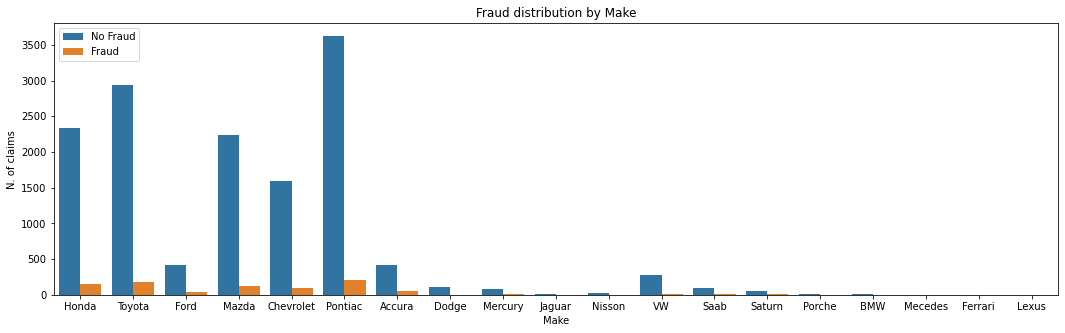

In [ ]:
plt.figure(figsize=(18, 5))

df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]

sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)

labels = ['No Fraud', 'Fraud']
plt.legend(labels)
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('N. of claims')
plt.show()

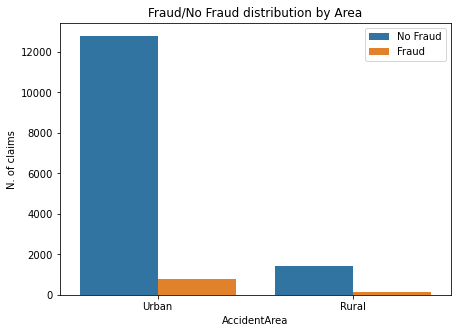

In [ ]:
df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]
plt.figure(figsize=(7,5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="AccidentArea", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

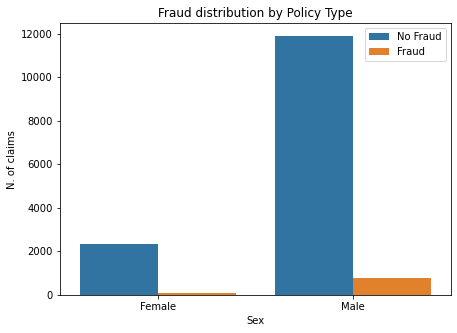

In [ ]:
plt.figure(figsize=(7, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Sex",hue="FraudFound_P" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Policy Type')
plt.xlabel('Sex')
plt.ylabel('N. of claims')
plt.show()

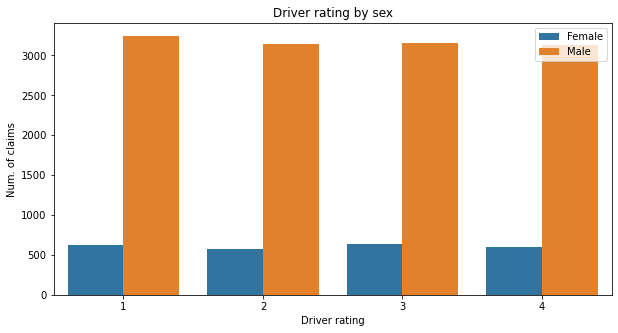

In [ ]:
Male = df.loc[df['Sex'] == 'Male']
Female = df.loc[df['Sex'] == 'Female']

plt.figure(figsize = (10,5))
sns.countplot(x = 'DriverRating', hue = 'Sex', data = df)

plt.legend(labels = ['Female','Male'], loc = 'upper right')
plt.ylabel('Num. of claims')
plt.xlabel('Driver rating')
plt.title('Driver rating by sex')
plt.show()

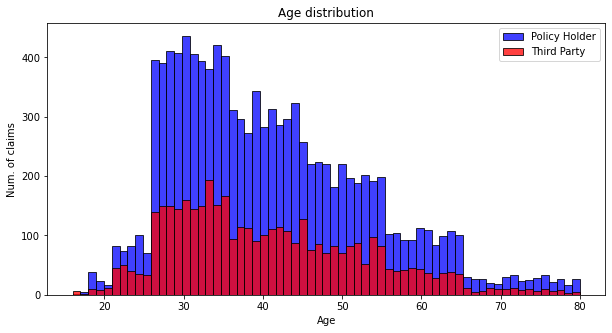

In [ ]:
df_third = df[(df['Fault']=='Third Party' )]
df_pol = df[(df['Fault']=='Policy Holder' )]
plt.figure(figsize=(10,5))
sns.histplot(data = df_pol, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_third, x = 'Age', color = 'red',  bins = 65)

plt.title("Age distribution")
plt.legend(["Policy Holder", "Third Party"])
plt.ylabel("Num. of claims")
plt.show()

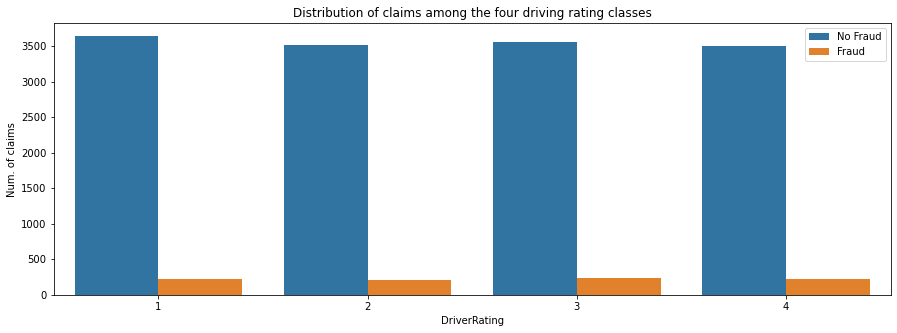

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Distribution of claims among the four driving rating classes')
sns.countplot(x='DriverRating', hue='FraudFound_P', data = df)
plt.ylabel('Num. of claims')
plt.legend(['No Fraud','Fraud'])
plt.show()

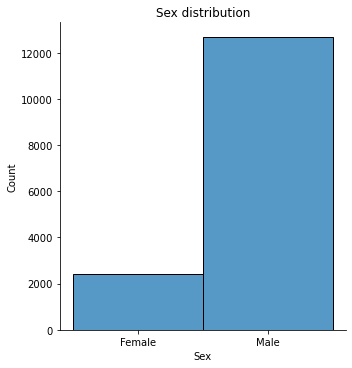

In [60]:
sns.displot(df['Sex'])
plt.title('Sex distribution')
plt.show()

In [61]:
df_temp = df.copy()
for labels, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_temp[labels] = pd.Categorical(content).codes

In [62]:
 df_temp.reset_index(inplace = True)

In [63]:
df_temp

,index,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Car_type
0,0,2,5,6,6,1,5,1,0,2,...,2,0,0,0,3,0,2,1994,2,1
1,1,4,3,6,6,1,1,4,1,2,...,3,1,0,0,3,3,0,1994,1,1
2,2,10,5,0,6,1,4,2,1,1,...,5,0,0,0,3,3,0,1994,1,1
3,3,6,2,2,17,0,0,1,1,1,...,6,1,0,0,2,3,0,1994,2,0
4,4,4,5,1,6,1,5,2,0,2,...,3,0,0,0,3,3,0,1994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,15095,9,4,0,17,1,5,5,1,1,...,3,0,0,0,3,3,0,1996,1,0
15096,15096,9,5,4,13,1,0,1,1,1,...,3,0,0,0,2,3,2,1996,2,0
15097,15097,9,5,4,17,0,0,1,1,2,...,2,0,0,0,0,3,0,1996,1,0
15098,15098,2,1,1,17,1,4,2,0,1,...,3,0,0,0,2,3,0,1996,0,0


In [64]:
df_temp.drop('index', axis = 1, inplace = True)

In [65]:
df_temp.describe()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Car_type
count,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,...,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000
mean,5.554702,2.791126,2.918477,10.201987,0.897616,3.204172,2.694371,0.839735,1.288609,40.700331,...,3.995563,0.027748,0.005629,0.015894,1.982450,2.888609,0.099205,1994.869272,1.035364,0.074371
std,3.417422,1.287610,2.054246,5.303966,0.303163,2.272186,1.259930,0.366864,0.469074,12.309493,...,1.213232,0.164256,0.074819,0.125070,1.112767,0.450962,0.384771,0.803246,0.780038,0.345606
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1994.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,6.000000,1.000000,1.000000,2.000000,1.000000,1.000000,31.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1994.000000,0.000000,0.000000
50%,6.000000,3.000000,3.000000,9.000000,1.000000,4.000000,3.000000,1.000000,1.000000,39.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1995.000000,1.000000,0.000000
75%,8.000000,4.000000,5.000000,13.000000,1.000000,5.000000,4.000000,1.000000,2.000000,49.000000,...,5.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1996.000000,2.000000,0.000000
max,11.000000,5.000000,6.000000,18.000000,1.000000,6.000000,5.000000,1.000000,3.000000,80.000000,...,7.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1996.000000,2.000000,2.000000


In [66]:
X = df_temp.drop("FraudFound_P",axis = 1)
y = df_temp["FraudFound_P"]

In [67]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15095    1
15096    0
15097    1
15098    0
15099    1
Name: FraudFound_P, Length: 15100, dtype: int64

In [68]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15095    1
15096    0
15097    1
15098    0
15099    1
Name: FraudFound_P, Length: 15100, dtype: int64

As we can see our data is unbalanced ( number of zeros are 15 times more than ones)

so we use scikit learn function to get wheigths for our data and balance it

In [214]:
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced',
                                                                        classes= np.unique(y_train), 
                                                                        y = y_train)))
class_weights

{0: 0.5303828591499824, 1: 8.728323699421965}

In [215]:
def metric_result(y_test, y_pred):

    return f1_score(y_test, y_pred, average='binary'), recall_score(y_test, y_pred), precision_score(y_test, y_pred)

In [216]:
def display_results(classifier, X, y):
    cv = StratifiedKFold(n_splits=5)
    
    y_test = np.empty([0], dtype=int)
    y_pred = np.empty([0], dtype=int)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    lst_accu_stratified = []
    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train], y.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X.iloc[test],
            y.iloc[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        y_pred_temp = classifier.predict(X.iloc[test])
        y_test_temp = y.iloc[test]
        y_test = np.append(y_test, y_test_temp)
        y_pred = np.append(y_pred, y_pred_temp)
        lst_accu_stratified_temp = metric_result(y_test_temp, y_pred_temp)
        lst_accu_stratified.append(lst_accu_stratified_temp)

        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Mean ROC curve with variability\n(Positive label FraudFound)",
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()
    plot_confusion_matrix(y_test, y_pred)
    a = np.array(lst_accu_stratified)
    res = np.average(a, axis=0)
    print("F1 Score : ",res[0])
    print("Recall Score : ",res[1])
    print("Precision Score : ",res[2])

In [217]:
def plot_confusion_matrix(actual_classes, predicted_classes, sorted_labels = ["Positive", "Negative"]):

    matrix = confusion_matrix(actual_classes, predicted_classes)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

Logistic Regression

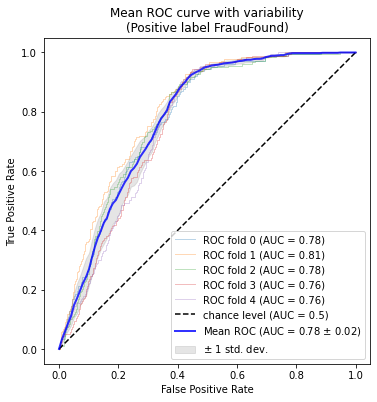

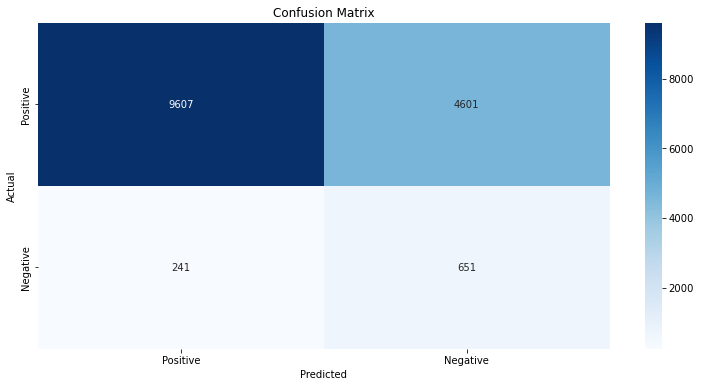

F1 Score :  0.21156668508933305
Recall Score :  0.7299792856694496
Precision Score :  0.12375824791156775


In [218]:
display_results(LogisticRegression(class_weight=class_weights,solver = 'liblinear'), X, y)

SVM with rbf kernel

C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


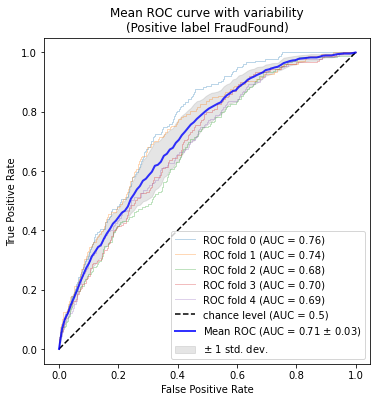

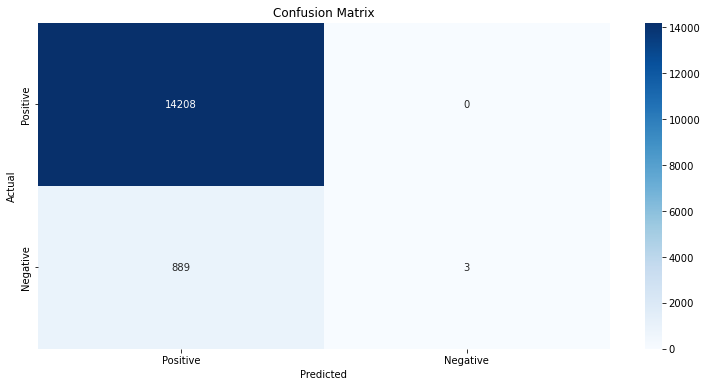

F1 Score :  0.006679081315952825
Recall Score :  0.003358232377126358
Precision Score :  0.6


In [225]:
display_results(make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf')), X, y)


SVM with polynomial kernel

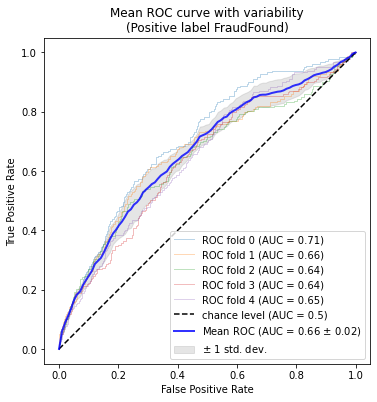

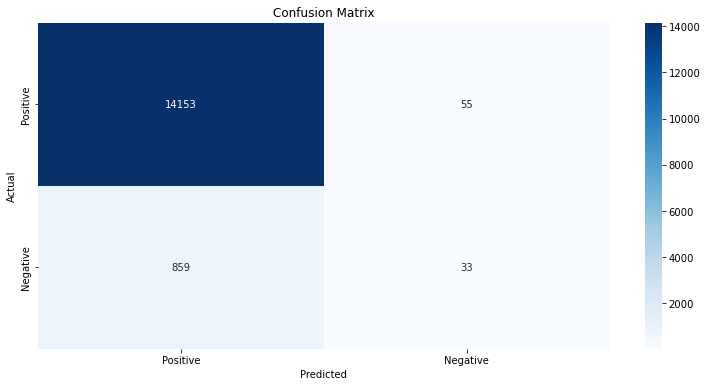

F1 Score :  0.06724462562250291
Recall Score :  0.03702215805661917
Precision Score :  0.368297213622291


In [226]:
display_results(make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly')), X, y)


SVM with sigmoid kernel

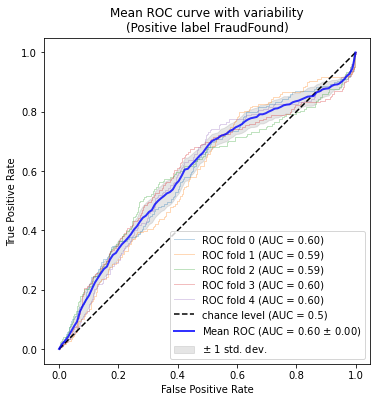

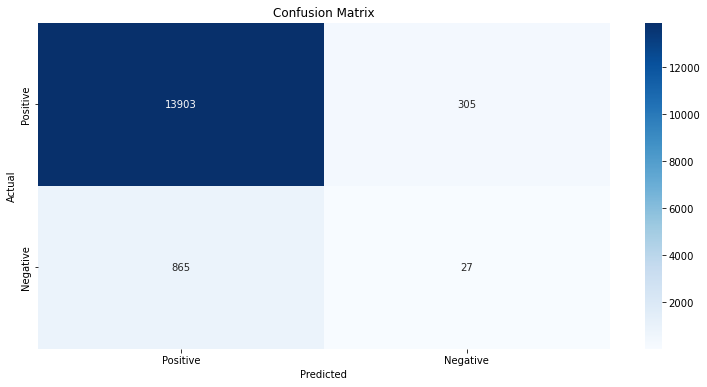

F1 Score :  0.043387977616653035
Recall Score :  0.03029313916263888
Precision Score :  0.07781506568144499


In [227]:
display_results(make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='sigmoid')), X, y)


Decision tree

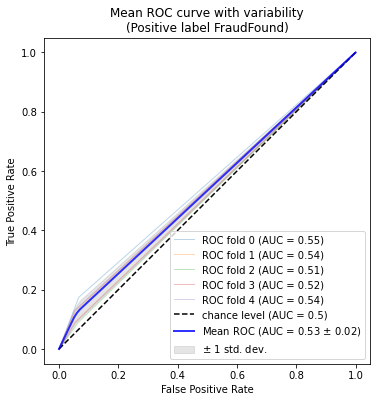

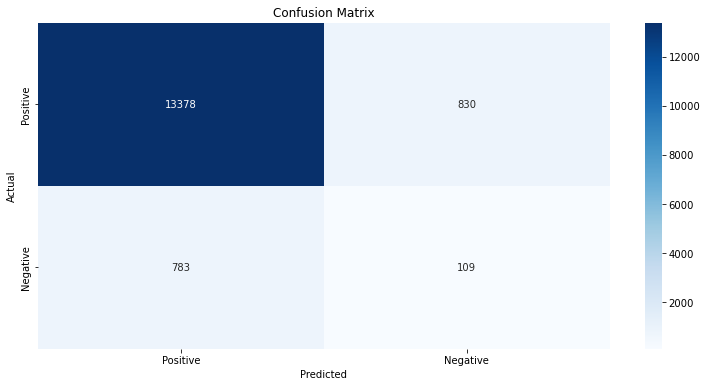

F1 Score :  0.11856823265933533
Recall Score :  0.12222710438767184
Precision Score :  0.11581161790117012


In [228]:
display_results(tree.DecisionTreeClassifier(), X, y)


Random forest

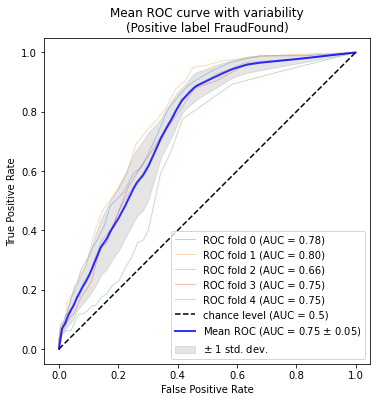

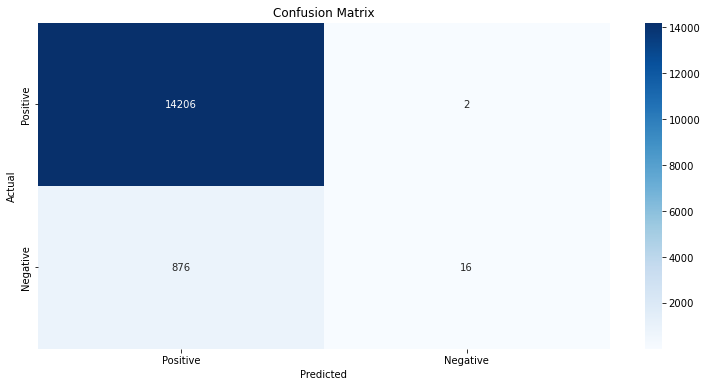

F1 Score :  0.03505976014263307
Recall Score :  0.017946142740568702
Precision Score :  0.9428571428571428


In [230]:
display_results(RandomForestClassifier(), X, y)


Naive Bayes

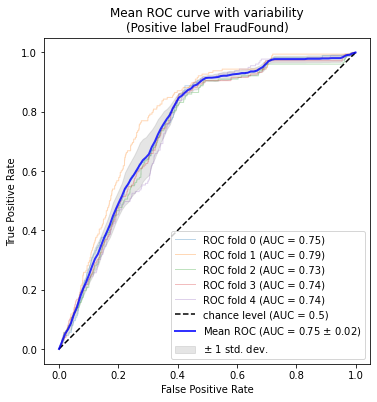

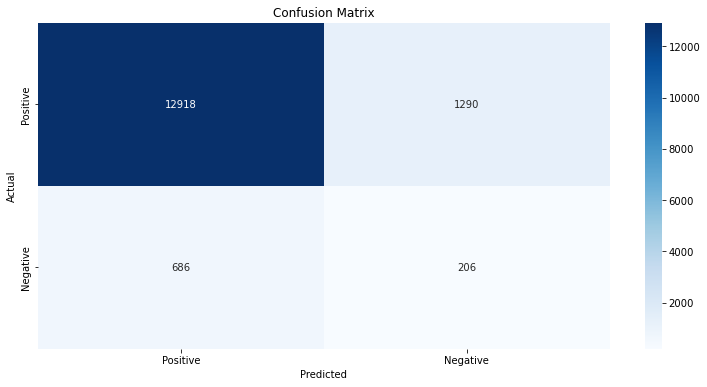

F1 Score :  0.17132321266161554
Recall Score :  0.23100244805724687
Precision Score :  0.13781554288082304


In [231]:
display_results(GaussianNB(), X, y)
  


Stacking

C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1381m\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\1381m\AppData\Roaming\Python\Python39\sit

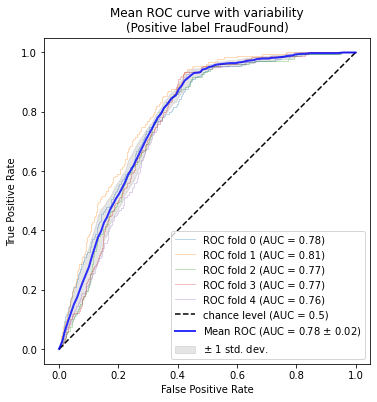

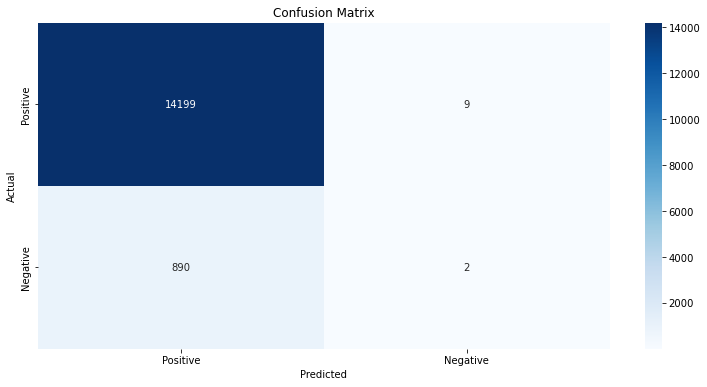

F1 Score :  0.004383594547528974
Recall Score :  0.0022409139413721675
Precision Score :  0.1


In [234]:
estimators = [
('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
('svr', make_pipeline(StandardScaler(),
                      LinearSVC(random_state=42)))
]

display_results(StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()), X, y)

Gradient boosting

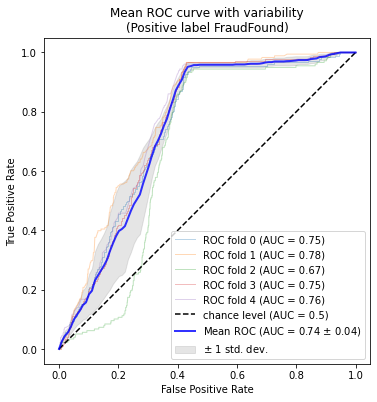

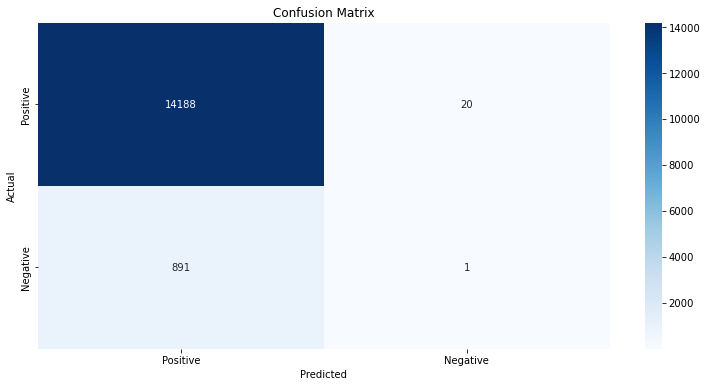

F1 Score :  0.002173913043478261
Recall Score :  0.0011235955056179774
Precision Score :  0.03333333333333333


In [235]:
display_results(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0), X, y)


Bagging

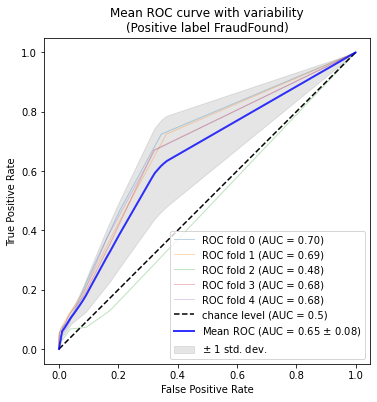

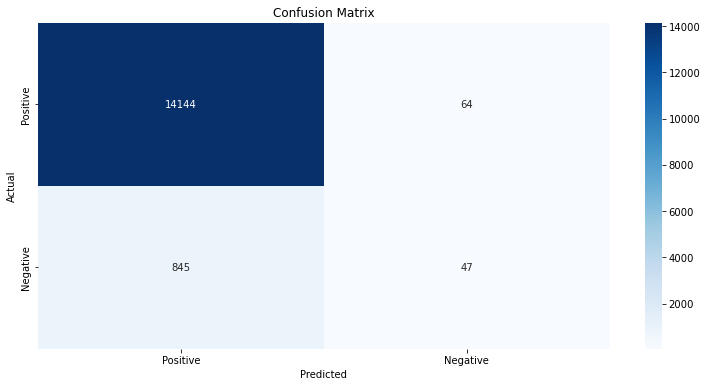

F1 Score :  0.09322408126519176
Recall Score :  0.05269600150649677
Precision Score :  0.45621848739495796


In [236]:
display_results(BaggingClassifier(n_estimators=10, random_state=0), X, y)


XGBoost

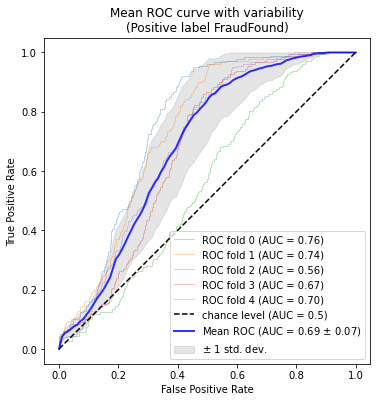

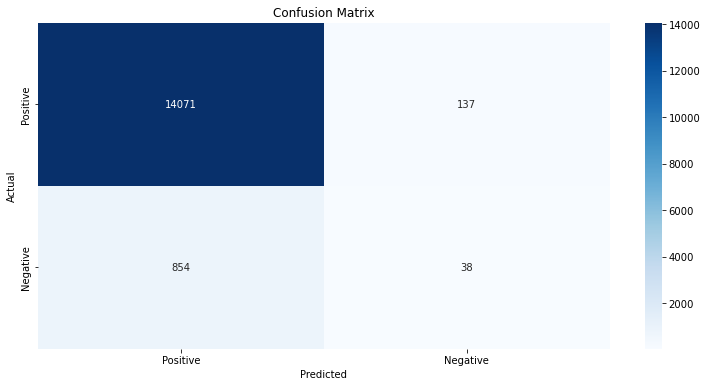

F1 Score :  0.07126493852836564
Recall Score :  0.04261502730525391
Precision Score :  0.22968268612946274


In [237]:
display_results(XGBClassifier(), X, y)

K nearest neighbors

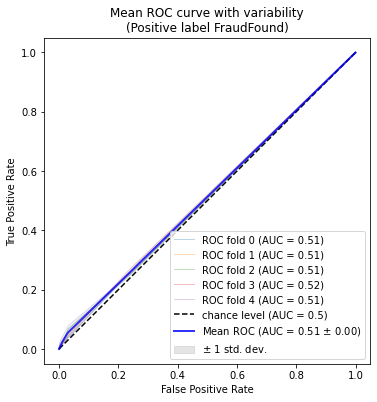

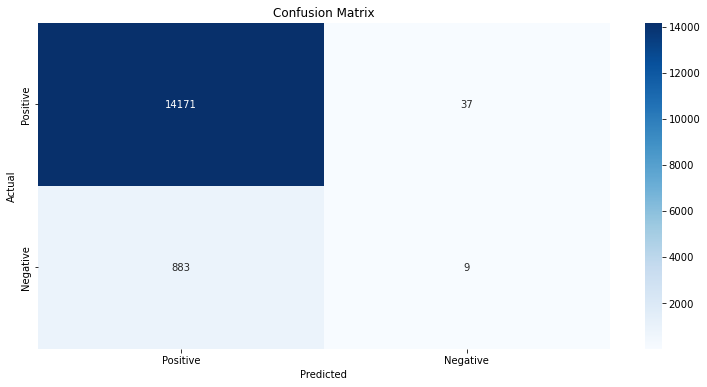

F1 Score :  0.01918416111964499
Recall Score :  0.010080974201242859
Precision Score :  0.2


In [238]:
display_results(KNeighborsClassifier(), X, y)

Hyperparameter tuning

In [96]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [97]:
gscv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)

In [99]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=  10.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=  10.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=  10.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=  10.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.942 total time=  10.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   9.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   8.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   9.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   9.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.942 total time=   8.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.943 total time=  25.9s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.943 total time=  24.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.942 total time=  28.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.942 total time=  25.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.943 total time=  12.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.943 total time=  12.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.943 total time=  15.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.942 total time=  13.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.942 total time=  14.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.905 total time=   3.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.904 total time=   3.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.901 total time=   3.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [101]:
gscv.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [102]:
gscv.best_estimator_

SVC(C=1000, gamma=0.0001)

In [103]:
grid_predictions = gscv.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2820
           1       0.71      0.03      0.05       200

    accuracy                           0.93      3020
   macro avg       0.82      0.51      0.51      3020
weighted avg       0.92      0.93      0.91      3020



In [105]:
rus = RandomUnderSampler(random_state=42, replacement=False)

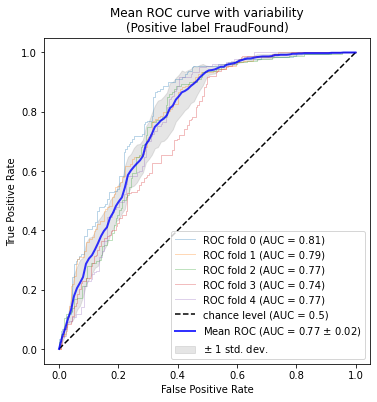

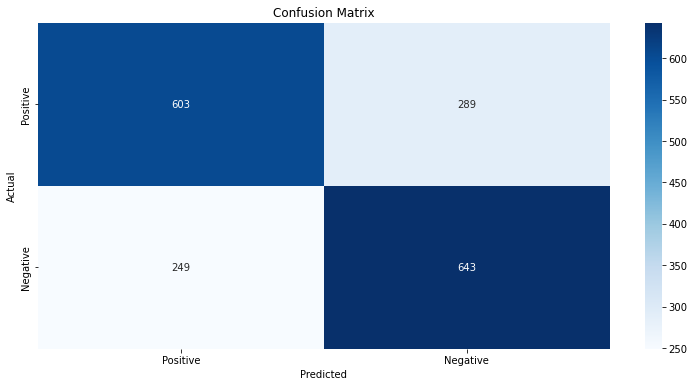

F1 Score :  0.7044303474981864
Recall Score :  0.7208775343669576
Precision Score :  0.6902244321736077


In [239]:
x_rus, y_rus = rus.fit_resample(X, y)
display_results(LogisticRegression(solver = 'liblinear'), x_rus, y_rus)


Oversampling

In [241]:
ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

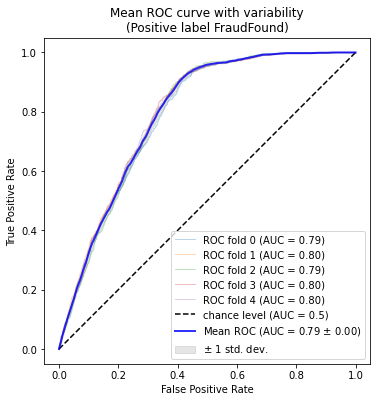

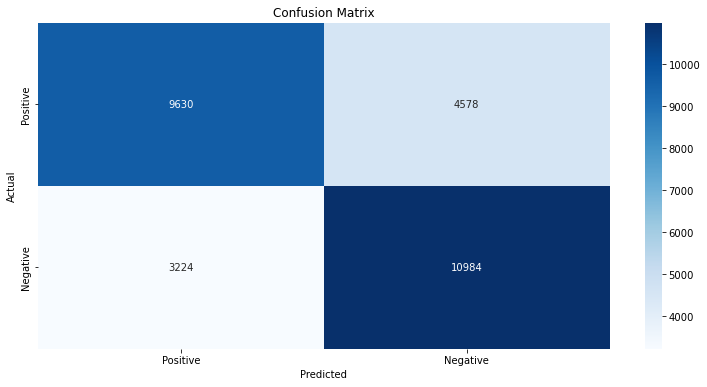

F1 Score :  0.737916771079512
Recall Score :  0.7730853459979922
Precision Score :  0.7058330635102859


In [242]:
display_results(LogisticRegression(solver = 'liblinear'), x_ros, y_ros)

In [243]:
y_ros.value_counts()

0    14208
1    14208
Name: FraudFound_P, dtype: int64

In [244]:
X

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Car_type
0,2,5,6,6,1,5,1,0,2,21,...,2,0,0,0,3,0,2,1994,2,1
1,4,3,6,6,1,1,4,1,2,34,...,3,1,0,0,3,3,0,1994,1,1
2,10,5,0,6,1,4,2,1,1,47,...,5,0,0,0,3,3,0,1994,1,1
3,6,2,2,17,0,0,1,1,1,65,...,6,1,0,0,2,3,0,1994,2,0
4,4,5,1,6,1,5,2,0,2,27,...,3,0,0,0,3,3,0,1994,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,9,4,0,17,1,5,5,1,1,35,...,3,0,0,0,3,3,0,1996,1,0
15096,9,5,4,13,1,0,1,1,1,30,...,3,0,0,0,2,3,2,1996,2,0
15097,9,5,4,17,0,0,1,1,2,24,...,2,0,0,0,0,3,0,1996,1,0
15098,2,1,1,17,1,4,2,0,1,34,...,3,0,0,0,2,3,0,1996,0,0


In [137]:
tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, y)

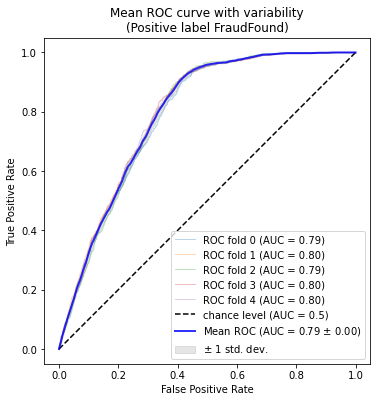

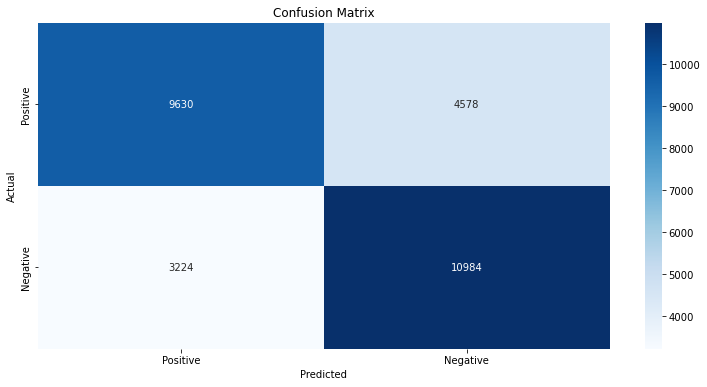

F1 Score :  0.737916771079512
Recall Score :  0.7730853459979922
Precision Score :  0.7058330635102859


In [245]:
display_results(LogisticRegression(solver = 'liblinear'), x_tl, y_tl)

In [246]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

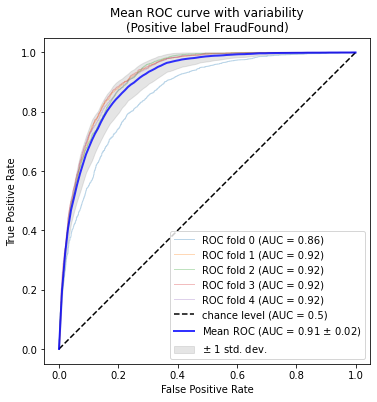

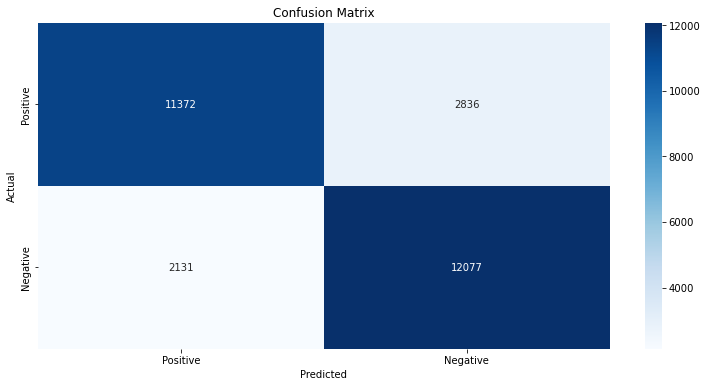

F1 Score :  0.8285796304084739
Recall Score :  0.8500173269613711
Precision Score :  0.8093073346314588


In [247]:
display_results(LogisticRegression(solver = 'liblinear'), x_smote, y_smote)

In [248]:
nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

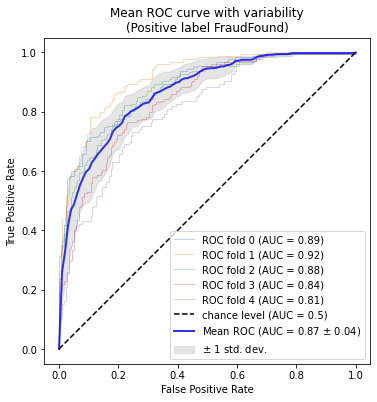

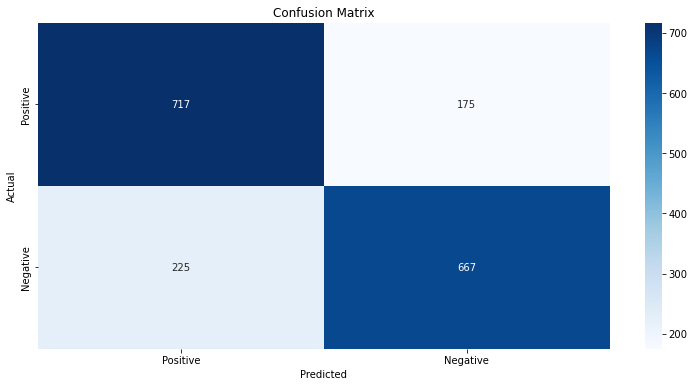

F1 Score :  0.7691080354778654
Recall Score :  0.7477873328730149
Precision Score :  0.792566033300788


In [249]:
display_results(LogisticRegression(solver = 'liblinear'), x_nm, y_nm)